In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path_models = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_2812"
path_metrics = "/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/ensemble_2812_log_files/"

***
# Examinate the Loss :

In [2]:
def make_table(log_file) :
    import pandas as pd
    lines_data = [line for line in open(log_file).read().split("\n") if line[0:6] == "Epoch:" if len(line.split("\t")) == 6] # if len(line.split("\t")) == 6*
    lines_split = [line.split("\t") for line in lines_data]
    df_raw = pd.DataFrame(lines_split , columns = ["Epoch","Train_loss","Test_loss","MCC","AUC","Acc"])
    df = df_raw.applymap(lambda x: float(x.split(":")[1]))
    df.set_index("Epoch", inplace = True)
    return df
    
def plot_loss(df) : 
    import matplotlib.pyplot as plt
    import seaborn as sns
    sns.set(style="whitegrid")
    plt.figure(figsize=(10, 6))
    plt.plot(df.index, df['Train_loss'], label='train loss', marker='o', linestyle='-', color ="red")
    plt.plot(df.index, df['Test_loss'], label='test loss', marker='s', linestyle='--', color = "blue")
    plt.title('Loss over epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)   
    plt.show()  
    

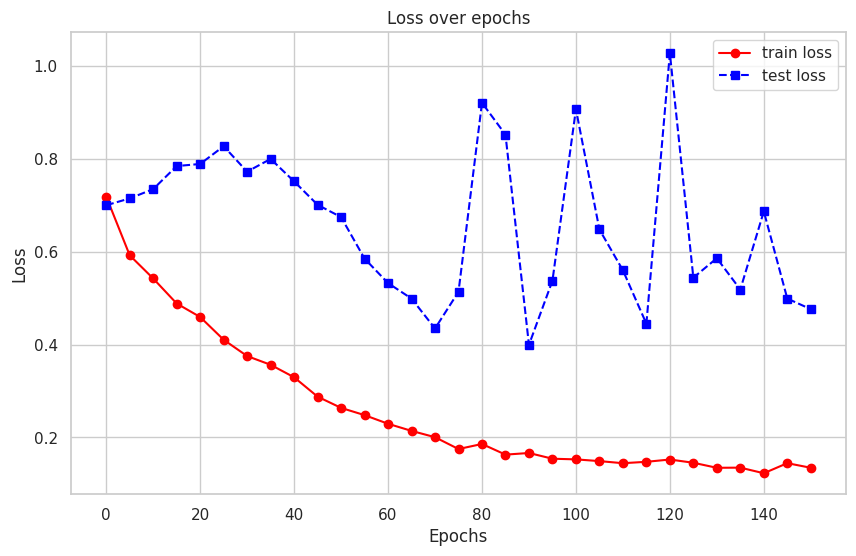

In [22]:
eg_df = make_table(f"{path_metrics}/KL3__node_classification.2812.log")
plot_loss(eg_df)

***
# Make clean table : 

In [4]:
metrics_names = ["KL_type" , "n_prophages", "F1_score", "precision" , "recall", "MCC", "Accuracy", "AUC"]
df_metrics = pd.read_csv(f"{path_models}/Metric_Report.2812.tsv", sep = "\t", names = metrics_names)

df_metrics = df_metrics.drop_duplicates(subset = ["KL_type"], keep = "last")

df_metrics_sorted = df_metrics.sort_values(by='KL_type', key=lambda x: x.str.split("KL").str[1].astype(int))
df_metrics_sorted.reset_index(drop=True, inplace=True)


In [5]:
df_metrics_sorted

,KL_type,n_prophages,F1_score,precision,recall,MCC,Accuracy,AUC
0,KL1,190,0.5185185185185185,0.875000,0.368421,0.522151,0.885965,0.929086
1,KL2,351,0.8732394366197184,0.861111,0.885714,0.847579,0.957143,0.960653
2,KL3,145,0.7741935483870968,0.705882,0.857143,0.730199,0.918605,0.904762
3,KL5,28,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
4,KL7,37,0.8571428571428571,0.750000,1.000000,0.841625,0.952381,1.000000
...,...,...,...,...,...,...,...,...
62,KL136,32,0.5714285714285715,0.500000,0.666667,0.484481,0.842105,0.937500
63,KL145,29,1.0,1.000000,1.000000,1.000000,1.000000,1.000000
64,KL149,70,0.75,0.666667,0.857143,0.700649,0.904762,0.844898
65,KL151,61,0.6153846153846153,0.571429,0.666667,0.533600,0.861111,0.683333


In [6]:
for col in df_metrics_sorted.columns:
    if col not in ["KL_type", "n_prophages"]:
        # Convert the column to numeric, using errors='coerce' to set non-convertible values to NaN
        df_metrics_sorted[col] = pd.to_numeric(df_metrics_sorted[col], errors='coerce')
        # Now apply rounding
        df_metrics_sorted[col] = df_metrics_sorted[col].round(4)

df_metrics_sorted

,KL_type,n_prophages,F1_score,precision,recall,MCC,Accuracy,AUC
0,KL1,190,0.5185,0.8750,0.3684,0.5222,0.8860,0.9291
1,KL2,351,0.8732,0.8611,0.8857,0.8476,0.9571,0.9607
2,KL3,145,0.7742,0.7059,0.8571,0.7302,0.9186,0.9048
3,KL5,28,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,KL7,37,0.8571,0.7500,1.0000,0.8416,0.9524,1.0000
...,...,...,...,...,...,...,...,...
62,KL136,32,0.5714,0.5000,0.6667,0.4845,0.8421,0.9375
63,KL145,29,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
64,KL149,70,0.7500,0.6667,0.8571,0.7006,0.9048,0.8449
65,KL151,61,0.6154,0.5714,0.6667,0.5336,0.8611,0.6833


In [7]:
#df_metrics_sorted.to_csv(f"/media/concha-eloko/Linux/PPT_clean/ficheros_28032023/Metric_Report.3012.clean.tsv", sep = "\t", index = False, header = True)

***
#

> Metrics by groups : 

In [8]:
g1_group = ["KL2", "KL17", "KL47", "KL64", "KL106", "KL107"]
g2_group = ["KL1", "KL3", "KL14", "KL15", "KL23", "KL24", "KL25", "KL27", "KL51", "KL62", "KL102"]

big_groups = g1_group + g2_group

g3_group = [kltype for kltype in df_metrics_sorted["KL_type"].tolist() if kltype not in big_groups]

In [20]:
import statistics

mcc_g1 = [float(row["MCC"]) for _,row in df_metrics_sorted.iterrows() if row["KL_type"] in g1_group]
mcc_g1_dico = {row["KL_type"] : float(row["MCC"]) for _,row in df_metrics_sorted.iterrows() if row["KL_type"] in g1_group}
mean_g1 = statistics.mean(mcc_g1)
std_g1 = statistics.stdev(mcc_g1)


mcc_g2 = [float(row["MCC"]) for _,row in df_metrics_sorted.iterrows() if row["KL_type"] in g2_group]
mcc_g2_dico = {row["KL_type"] : float(row["MCC"]) for _,row in df_metrics_sorted.iterrows() if row["KL_type"] in g2_group}
mean_g2 = statistics.mean(mcc_g2)
std_g2 = statistics.stdev(mcc_g2)


mcc_g3 = [float(row["MCC"]) for _,row in df_metrics_sorted.iterrows() if row["KL_type"] in g3_group]
mcc_g3_dico = {row["KL_type"] : float(row["MCC"]) for _,row in df_metrics_sorted.iterrows() if row["KL_type"] in g3_group}
mean_g3 = statistics.mean(mcc_g3)
std_g3 = statistics.stdev(mcc_g3)




In [23]:
round(mean_g3, 4) , round(std_g3 , 4)

(0.4845, 0.2549)

In [24]:
mcc_g3_dico

{'KL5': 1.0,
 'KL7': 0.8416,
 'KL8': 0.2582,
 'KL9': -0.1348,
 'KL10': 0.7059,
 'KL12': 0.2887,
 'KL13': 0.4411,
 'KL16': -0.1538,
 'KL18': 0.3948,
 'KL19': 0.8571,
 'KL21': 0.52,
 'KL22': 0.5801,
 'KL28': 0.6641,
 'KL29': 0.2887,
 'KL30': 0.4742,
 'KL34': 0.2582,
 'KL36': 0.7045,
 'KL38': 0.3233,
 'KL39': 0.2222,
 'KL43': 0.7785,
 'KL45': 0.7229,
 'KL46': 0.3464,
 'KL48': 0.4091,
 'KL52': 0.14,
 'KL53': 0.6325,
 'KL55': 0.4714,
 'KL57': 0.5992,
 'KL60': 0.4443,
 'KL63': 0.4924,
 'KL70': 0.5606,
 'KL74': 0.3599,
 'KL81': 0.3536,
 'KL105': 0.6978,
 'KL108': 0.4781,
 'KL110': 0.4845,
 'KL111': 0.4874,
 'KL112': 0.2,
 'KL114': 0.5477,
 'KL116': 0.4714,
 'KL118': 0.5394,
 'KL122': 0.5606,
 'KL123': 0.488,
 'KL125': 0.6814,
 'KL127': 0.7246,
 'KL128': 0.5394,
 'KL136': 0.4845,
 'KL145': 1.0,
 'KL149': 0.7006,
 'KL151': 0.5336,
 'KL169': -0.2365}